In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
data = \
[[['аксюша', 'карп'],
  ['аксюша', 'буланов', 'карп', 'улита'],
  ['буланов', 'карп', 'улита'],
  ['бодаев', 'буланов', 'гурмыжская', 'карп', 'милонов'],
  ['бодаев', 'восмибратов', 'гурмыжская', 'милонов', 'петр'],
  ['восмибратов', 'гурмыжская', 'петр'],
  ['аксюша', 'гурмыжская', 'карп', 'улита'],
  ['гурмыжская', 'улита']],
 [['аксюша', 'петр'], ['несчастливцев', 'счастливцев']],
 [['буланов', 'гурмыжская'],
  ['буланов', 'гурмыжская', 'карп'],
  ['несчастливцев', 'счастливцев'],
  ['карп', 'несчастливцев', 'счастливцев'],
  ['восмибратов', 'карп', 'петр'],
  ['буланов', 'несчастливцев'],
  ['буланов', 'гурмыжская', 'карп', 'несчастливцев'],
  ['восмибратов', 'гурмыжская', 'петр'],
  ['буланов', 'гурмыжская', 'карп', 'несчастливцев', 'счастливцев'],
  ['буланов', 'восмибратов', 'карп', 'несчастливцев', 'петр', 'счастливцев'],
  ['буланов', 'восмибратов', 'гурмыжская', 'карп', 'несчастливцев', 'петр', 'счастливцев'],
  ['буланов', 'гурмыжская', 'счастливцев']],
 [['несчастливцев', 'счастливцев'],
  ['карп', 'улита'],
  ['карп', 'счастливцев', 'улита'],
  ['счастливцев', 'улита'],
  ['аксюша', 'петр'],
  ['аксюша', 'несчастливцев', 'счастливцев'],
  ['гурмыжская', 'улита'],
  ['буланов', 'гурмыжская']],
 [['буланов', 'карп'],
  ['буланов', 'несчастливцев'],
  ['буланов', 'гурмыжская'],
  ['аксюша', 'гурмыжская', 'карп'],
  ['гурмыжская', 'карп', 'несчастливцев'],
  ['несчастливцев', 'счастливцев'],
  ['аксюша', 'несчастливцев', 'петр'],
  ['бодаев', 'буланов', 'гурмыжская', 'карп', 'милонов'],
  ['аксюша', 'бодаев', 'буланов', 'восмибратов', 'гурмыжская', 'карп', 'милонов', 'несчастливцев', 'петр', 'счастливцев']]]

## Занятость

In [3]:
drama_heroes = [hero for scene in [scene for act in data for scene in act] for hero in scene]
busyness = pd.DataFrame(Counter(drama_heroes), index=['занятость'])
busyness

,аксюша,бодаев,буланов,восмибратов,гурмыжская,карп,милонов,несчастливцев,петр,счастливцев,улита
занятость,9,4,17,7,19,19,4,15,10,13,8


## Матрица

In [4]:
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [5]:
def col(na, ns): return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[na] + '.' + str(ns)
columns = [[col(na+1, ns+1) for ns in range(len(matrices[na][0]))] for na in range(len(matrices))]
columns = [col for item in columns for col in item]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=columns)

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,I.8,II.1,II.2,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,III.9,III.10,III.11,III.12,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6,IV.7,IV.8,V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9
аксюша,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1
бодаев,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
буланов,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1
восмибратов,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
гурмыжская,0,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1
карп,1,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1
милонов,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
несчастливцев,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,1
петр,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
счастливцев,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1


## Мобильность

In [6]:
mobility = (np.sum(np.abs(matrix[:, 1:] - matrix[:, :-1]), axis=1) - 1) / (len(matrix[0])-1)

In [7]:
pd.DataFrame({h: m for h, m in zip(drama_heroes, mobility)}, index=['мобильность']).round(3)

,аксюша,бодаев,буланов,восмибратов,гурмыжская,карп,милонов,несчастливцев,петр,счастливцев,улита
мобильность,0.289,0.053,0.263,0.211,0.316,0.447,0.053,0.421,0.368,0.316,0.184


## Плотность

In [8]:
def density(matrix):
    print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

### Пьесы

In [9]:
round(density(matrix), 3)

125/429, 

0.291

### Действий

In [10]:
act_density = [density(m) for m in matrices]
pd.DataFrame({i: d for i, d in enumerate(act_density, start=1)}, index=['плотность']).round(3)

28/88, 4/22, 43/132, 18/88, 32/99, 

,1,2,3,4,5
плотность,0.318,0.182,0.326,0.205,0.323


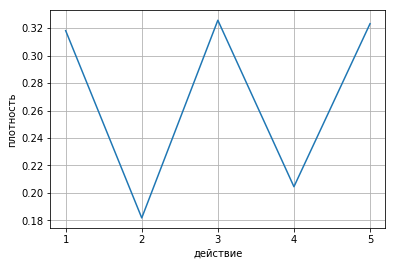

In [11]:
plt.plot(act_density)
plt.xticks(range(len(act_density)), range(1, len(act_density)+1))
plt.xlabel('действие')
plt.ylabel('плотность')
plt.grid()

### Явлений

In [12]:
scene_density = [[density(m[:, i]) for i in range(len(m[0]))] for m in matrices]

df = pd.DataFrame(scene_density, index=range(1, len(matrices)+1))
df.columns = df.columns + 1
df.index.name = 'действие'
df.round(3)

2/11, 4/11, 3/11, 5/11, 5/11, 3/11, 4/11, 2/11, 2/11, 2/11, 2/11, 3/11, 2/11, 3/11, 3/11, 2/11, 4/11, 3/11, 5/11, 6/11, 7/11, 3/11, 2/11, 2/11, 3/11, 2/11, 2/11, 3/11, 2/11, 2/11, 2/11, 2/11, 2/11, 3/11, 3/11, 2/11, 3/11, 5/11, 10/11, 

,1,2,3,4,5,6,7,8,9,10,11,12
действие,,,,,,,,,,,,
1,0.182,0.364,0.273,0.455,0.455,0.273,0.364,0.182,NaN,NaN,NaN,NaN
2,0.182,0.182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.182,0.273,0.182,0.273,0.273,0.182,0.364,0.273,0.455,0.545,0.636,0.273
4,0.182,0.182,0.273,0.182,0.182,0.273,0.182,0.182,NaN,NaN,NaN,NaN
5,0.182,0.182,0.182,0.273,0.273,0.182,0.273,0.455,0.909,NaN,NaN,NaN


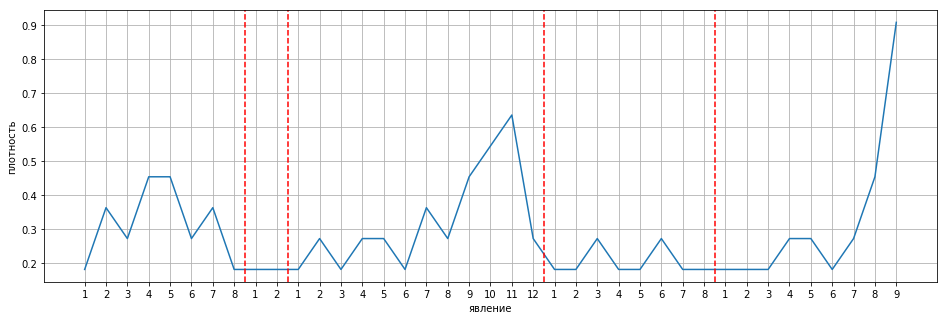

In [13]:
from itertools import accumulate
plt.subplots(figsize=(16, 5))
plt.plot([d for a in scene_density for d in a])
plt.xticks(range(len(columns)), [i for a in scene_density for i in range(1, len(a)+1)])
for x in accumulate([len(a) for a in scene_density][:-1]):
    plt.axvline(x-0.5, c='r', ls='--')
plt.xlabel('явление')
plt.ylabel('плотность')
plt.grid()

## Расстояние

In [16]:
distances_act = []
for mat in matrices:
    dist = np.zeros((len(drama_heroes), len(drama_heroes)))*np.nan
    for i in range(len(mat)-1):
        for j in range(i+1, len(mat)):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = np.sum(np.abs(mat[i] - mat[j]))
    distances_act.append(dist/len(mat[0]))

In [17]:
distances_drama = np.zeros((len(drama_heroes), len(drama_heroes)))*np.nan
for i in range(len(matrix)-1):
    for j in range(i+1, len(matrix)):
        distances_drama[i][j] = distances_drama[j][i] = np.sum(np.abs(matrix[i] - matrix[j]))
distances_drama /= len(matrix[0])

In [18]:
dfs = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in distances_act]
dfs += [pd.DataFrame(distances_drama, index=drama_heroes, columns=drama_heroes).stack()]
df = pd.concat(dfs, axis=1)
df.columns = list(range(1, len(matrices)+1)) + ['пьеса']
df.round(2)

1    2     3     4     5  пьеса
аксюша      бодаев         0.62  NaN   NaN   NaN  0.33   0.28
            буланов        0.50  NaN   NaN  0.38  0.67   0.56
            восмибратов    0.62  NaN   NaN   NaN  0.22   0.36
            гурмыжская     0.75  NaN   NaN  0.50  0.44   0.56
            карп           0.25  NaN   NaN  0.50  0.44   0.46
            милонов        0.62  NaN   NaN   NaN  0.33   0.28
            несчастливцев   NaN  1.0   NaN  0.25  0.44   0.46
            петр           0.62  0.0   NaN  0.12  0.11   0.28
            счастливцев     NaN  1.0   NaN  0.50  0.33   0.46
            улита          0.38  NaN   NaN  0.75   NaN   0.33
бодаев      аксюша          NaN  NaN   NaN   NaN   NaN   0.28
            буланов        0.38  NaN   NaN   NaN  0.33   0.38
            восмибратов    0.25  NaN   NaN   NaN  0.11   0.18
            гурмыжская     0.38  NaN   NaN   NaN  0.33   0.38
            карп           0.62  NaN   NaN   NaN  0.33   0.44
            милонов        0.00  NaN   NaN   NaN  0.00   0.00
            несчастливцев   NaN  NaN   NaN   NaN  0.56   0.44
            петр           0.25  NaN   NaN   NaN  0.22   0.26
            счастливцев     NaN  NaN   NaN   NaN  0.22   0.38
            улита          0.75  NaN   NaN   NaN   NaN   0.31
буланов     аксюша          NaN  NaN   NaN   NaN   NaN   0.56
            бодаев          NaN  NaN   NaN   NaN   NaN   0.38
            восмибратов    0.62  NaN  0.67   NaN  0.44   0.46
            гурмыжская     0.75  NaN  0.25  0.12  0.44   0.36
            карп           0.25  NaN  0.42  0.38  0.44   0.36
            милонов        0.38  NaN   NaN   NaN  0.33   0.38
            несчастливцев   NaN  NaN  0.42  0.38  0.67   0.46
            петр           0.62  NaN  0.67  0.25  0.56   0.54
            счастливцев     NaN  NaN  0.50  0.62  0.56   0.51
            улита          0.38  NaN   NaN  0.62   NaN   0.54
...                         ...  ...   ...   ...   ...    ...
петр        аксюша          NaN  NaN   NaN   NaN   NaN   0.28
            бодаев          NaN  NaN   NaN   NaN   NaN   0.26
            буланов         NaN  NaN   NaN   NaN   NaN   0.54
            восмибратов     NaN  NaN   NaN   NaN   NaN   0.08
            гурмыжская      NaN  NaN   NaN   NaN   NaN   0.49
            карп            NaN  NaN   NaN   NaN   NaN   0.54
            милонов         NaN  NaN   NaN   NaN   NaN   0.26
            несчастливцев   NaN  NaN   NaN   NaN   NaN   0.44
            счастливцев     NaN  1.0  0.50  0.62  0.22   0.44
            улита          0.75  NaN   NaN  0.62   NaN   0.46
счастливцев аксюша          NaN  NaN   NaN   NaN   NaN   0.46
            бодаев          NaN  NaN   NaN   NaN   NaN   0.38
            буланов         NaN  NaN   NaN   NaN   NaN   0.51
            восмибратов     NaN  NaN   NaN   NaN   NaN   0.36
            гурмыжская      NaN  NaN   NaN   NaN   NaN   0.62
            карп            NaN  NaN   NaN   NaN   NaN   0.51
            милонов         NaN  NaN   NaN   NaN   NaN   0.38
            несчастливцев   NaN  NaN   NaN   NaN   NaN   0.21
            петр            NaN  NaN   NaN   NaN   NaN   0.44
            улита           NaN  NaN   NaN  0.50   NaN   0.44
улита       аксюша          NaN  NaN   NaN   NaN   NaN   0.33
            бодаев          NaN  NaN   NaN   NaN   NaN   0.31
            буланов         NaN  NaN   NaN   NaN   NaN   0.54
            восмибратов     NaN  NaN   NaN   NaN   NaN   0.38
            гурмыжская      NaN  NaN   NaN   NaN   NaN   0.54
            карп            NaN  NaN   NaN   NaN   NaN   0.44
            милонов         NaN  NaN   NaN   NaN   NaN   0.31
            несчастливцев   NaN  NaN   NaN   NaN   NaN   0.59
            петр            NaN  NaN   NaN   NaN   NaN   0.46
            счастливцев     NaN  NaN   NaN   NaN   NaN   0.44

[110 rows x 6 columns]

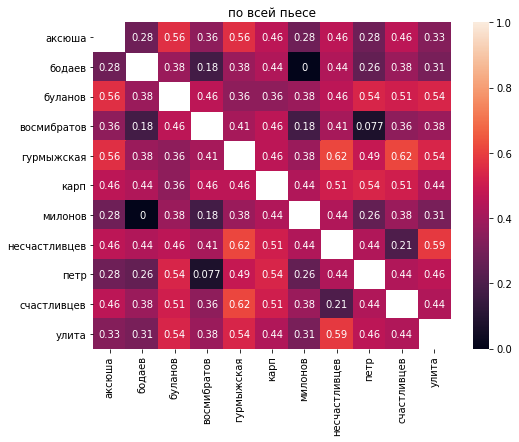

In [19]:
import seaborn as sns
plt.subplots(figsize=(8, 6))
sns.heatmap(distances_drama, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [22]:
for i, j in zip(*np.where(distances_drama == 0)):
    if i != j and i > j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

милонов = бодаев


## Ранг

In [23]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]

In [24]:
df = pd.DataFrame({h: r for h, r in zip(drama_heroes, rank)}, index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)
df

,карп,гурмыжская,буланов,несчастливцев,счастливцев,петр,восмибратов,аксюша,бодаев,милонов,улита
ранг,58,54,50,41,37,34,30,24,21,21,14


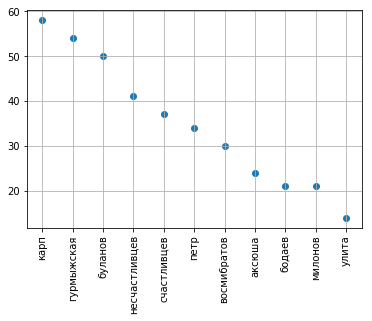

In [25]:
plt.scatter(range(len(drama_heroes)), df.values)
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90)
plt.grid()

## Абсолютные относительные частоты

In [26]:
busyness = busyness.values[0]

In [27]:
freq_abs = busyness/len(matrix[0])
pd.DataFrame({h: f for h, f in zip(drama_heroes, freq_abs)}, index=['частоты']).round(3)

,аксюша,бодаев,буланов,восмибратов,гурмыжская,карп,милонов,несчастливцев,петр,счастливцев,улита
частоты,0.231,0.103,0.436,0.179,0.487,0.487,0.103,0.385,0.256,0.333,0.205


## Условные относительные частоты

In [28]:
freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
for i in range(len(matrix)):
    for j in range(len(matrix)):
        freq_rel[i, j] = np.count_nonzero(matrix[i] + matrix[j] - 2 == 0)/busyness[j]

In [29]:
pd.DataFrame(freq_rel, index=drama_heroes, columns=drama_heroes).round(3)

,аксюша,бодаев,буланов,восмибратов,гурмыжская,карп,милонов,несчастливцев,петр,счастливцев,улита
аксюша,1.000,0.25,0.118,0.143,0.158,0.263,0.25,0.200,0.4,0.154,0.250
бодаев,0.111,1.00,0.176,0.286,0.211,0.158,1.00,0.067,0.2,0.077,0.000
буланов,0.222,0.75,1.000,0.429,0.579,0.579,0.75,0.467,0.3,0.385,0.250
восмибратов,0.111,0.50,0.176,1.000,0.263,0.211,0.50,0.200,0.7,0.231,0.000
гурмыжская,0.333,1.00,0.647,0.714,1.000,0.526,1.00,0.333,0.5,0.308,0.375
карп,0.556,0.75,0.647,0.571,0.526,1.000,0.75,0.467,0.4,0.462,0.625
милонов,0.111,1.00,0.176,0.286,0.211,0.158,1.00,0.067,0.2,0.077,0.000
несчастливцев,0.333,0.25,0.412,0.429,0.263,0.368,0.25,1.000,0.4,0.769,0.000
петр,0.444,0.50,0.176,1.000,0.263,0.211,0.50,0.267,1.0,0.231,0.000
счастливцев,0.222,0.25,0.294,0.429,0.211,0.316,0.25,0.667,0.3,1.000,0.250


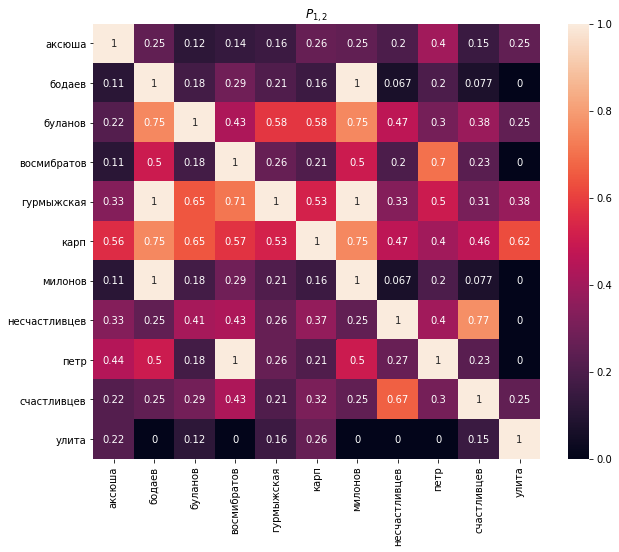

In [30]:
plt.subplots(figsize=(10, 8))
sns.heatmap(freq_rel, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
plt.title(r"$P_{1,2}$");

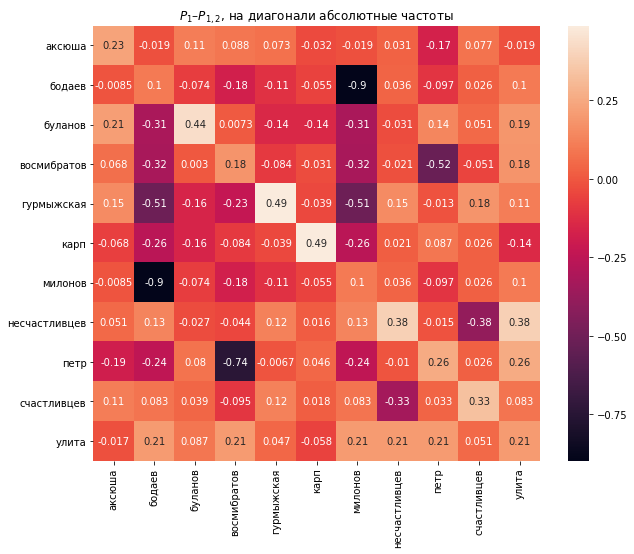

In [31]:
freq = freq_abs.reshape((-1, 1)) - freq_rel
freq[np.diag_indices(len(freq[0]))] = freq_abs
plt.subplots(figsize=(10, 8))
sns.heatmap(freq, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");